# THE FETCHER

The Fetcher a full desicion making from data application with every step till the decision making :
in the module of "traitement et visualisation de donnee" aka data visualisation and treatment we asked to make a full application that takes a data from any source (API, Web Scrapping, .csv or .xls, from a embedded system) and clean it analyse it visulalise it and at the end make a desicion out of the analysis of the selected data.

## > chosen data

in this project we found multipe data sources like :
* API
* WS(Web Scrapping)
* .csv/.xls file
* captors
...

and after thourough search we found that the best we can find is:
#### a non cleaned .csv file.
### why the .csv ?
1. for big data analysis : .csv files can hold up to infinite data sizes depends on the dataset.
2. easy access : in contrast of APIs where you need keys and access .csv files are everywhere and accessible by everyone who has the file.
3. simple to analyse : python frameworks like numpy, pandas have builtins that already turns csv files to a pandas dataframe and simply manipulate the data in the file. 

## THE CHOSEN DATASET
in the search of the datasets to use in this project our main goal is to look for 3 main criteria :
- uncleaned big dataset : to go with the cleaning process we needed somehow a mid->big dataset that we can opperate on you may ask why? that is because when we delete duplicates NULL values and incoherent data we need to still have an extentive and versatile data to analyse it.
- meaningfull : we were looking for some data that has value that we can make desiscions out of it.
- versatile : multiple column with diverse values and modalities.

after we scrapped every open datasets website we found 3 candidates :
1. Unclean Airline Customer Dataset : https://www.kaggle.com/datasets/edisugiarto/unclean-airline-customer-dataset/data
2. Uncleaned Laptop Price dataset :https://www.kaggle.com/datasets/ehtishamsadiq/uncleaned-laptop-price-dataset
3. Customer Transactions Dataset :https://www.kaggle.com/datasets/mohammedarfathr/customer-transactions-dataset

no wonder why we found them all in kaggle :)
after some digging we were conviced that the first one (Unclean Airline Customer Dataset) is the best of them. why? multiple values, 23 columns, XXXX rows. it is what we needed for the treatment.

# IMPORT LIBRARIES
* pandas for dataframes and numpy tableaux
* numpy for data manipulation
* plt for visualisation
* seaborn for visualisation

In [323]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import math
import string

data = pd.read_csv("flight.csv")


In [324]:
# Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x) 
#pd.set_option('display.max_rows', None)

# SHOWING THE DATASET

In [325]:
print(data.dtypes)
print("shape of our data (rows, column):",data.shape)

MEMBER_NO              int64
FFP_DATE              object
FIRST_FLIGHT_DATE     object
GENDER                object
FFP_TIER               int64
WORK_CITY             object
WORK_PROVINCE         object
WORK_COUNTRY          object
AGE                  float64
LOAD_TIME             object
FLIGHT_COUNT           int64
BP_SUM                 int64
SUM_YR_1             float64
SUM_YR_2             float64
SEG_KM_SUM             int64
LAST_FLIGHT_DATE      object
LAST_TO_END            int64
AVG_INTERVAL         float64
MAX_INTERVAL           int64
EXCHANGE_COUNT         int64
avg_discount         float64
Points_Sum             int64
Point_NotFlight        int64
dtype: object
shape of our data (rows, column): (62988, 23)


In [326]:
print(data.head(10))

   MEMBER_NO   FFP_DATE FIRST_FLIGHT_DATE  GENDER  FFP_TIER    WORK_CITY  \
0      54993  11/2/2006        12/24/2008    Male         6            .   
1      28065  2/19/2007          8/3/2007    Male         6          NaN   
2      55106   2/1/2007         8/30/2007    Male         6            .   
3      21189  8/22/2008         8/23/2008    Male         5  Los Angeles   
4      39546  4/10/2009         4/15/2009    Male         6      guiyang   
5      56972  2/10/2008         9/29/2009    Male         6    guangzhou   
6      44924  3/22/2006         3/29/2006    Male         6  wulumuqishi   
7      22631   4/9/2010          4/9/2010  Female         6   wenzhoushi   
8      32197   6/7/2011          7/1/2011    Male         5       DRANCY   
9      31645   7/5/2010          7/5/2010  Female         6      wenzhou   

  WORK_PROVINCE WORK_COUNTRY   AGE  LOAD_TIME  FLIGHT_COUNT  BP_SUM  SUM_YR_1  \
0       beijing           CN 31.00  3/31/2014           210  505308 239560.00   
1

# I- DATA CLEANING & TRANSFORMATION
in the data cleaning process we need to clean data to make it ready for manipulation 
there are many tricks to do that(remove duplicates, remove null value row or column depends on the null density, linear regression to fill up the null value ...).

1. removing duplicates :

Pandas drop_duplicates() method helps in removing duplicates from the Pandas Dataframe allows to remove duplicate rows from a DataFrame, either based on all columns or specific ones in python.

In [327]:
print(data.duplicated().sum)
print("number of rows before dropping duplicates" , len(data))
data.drop_duplicates(keep='first',inplace=True)
print("number of rows after dropping duplicates" , len(data))

<bound method Series.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
62983    False
62984    False
62985    False
62986    False
62987    False
Length: 62988, dtype: bool>
number of rows before dropping duplicates 62988
number of rows after dropping duplicates 62988


as you can see our data contains no duplicates wich is good for us.

2. removing null values if the column is important :

Now that we have a better understanding of how the data is structured we can move on to the nitty gritty of cleaning and begin by searching for any null values and handling them if present.

In [328]:
#printing the number of nulls
nulled = data.isnull()
print(nulled.sum())

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64


In [329]:
for col in data.columns :
    print(f"{col}: {data[col].unique()} unique values")
    print(f"{col}: {data[col].nunique()} unique values")

MEMBER_NO: [54993 28065 55106 ... 45690 61027 61340] unique values
MEMBER_NO: 62988 unique values
FFP_DATE: ['11/2/2006' '2/19/2007' '2/1/2007' ... '5/3/2009' '1/25/2010' '5/19/2009'] unique values
FFP_DATE: 3068 unique values
FIRST_FLIGHT_DATE: ['12/24/2008' '8/3/2007' '8/30/2007' ... '3/30/2014' '3/25/2014'
 '3/24/2014'] unique values
FIRST_FLIGHT_DATE: 3406 unique values
GENDER: ['Male' 'Female' nan] unique values
GENDER: 2 unique values
FFP_TIER: [6 5 4] unique values
FFP_TIER: 3 unique values
WORK_CITY: ['.' nan 'Los Angeles' ... 'BELLREGUARD' 'Danville' 'lingshui'] unique values
WORK_CITY: 3234 unique values
WORK_PROVINCE: ['beijing' 'CA' 'guizhou' ... 'NOTARIO' 'TOPKPPI' 'JAWATIMUR'] unique values
WORK_PROVINCE: 1165 unique values
WORK_COUNTRY: ['CN' 'US' 'FR' 'AN' 'JP' 'HK' 'MY' 'AU' 'NL' 'MX' 'CA' 'KR' 'PK' 'TH'
 'SG' 'BR' 'PE' 'AE' 'HN' 'PH' 'ID' 'MO' 'GN' 'FL' 'KH' nan 'TW' 'VN' 'DE'
 'IL' 'CH' 'PA' 'VT' 'EC' 'NG' 'BI' 'GT' 'BE' 'GL' 'NZ' 'FA' 'NI' 'KO'
 'CC' 'UV' 'MN' 'UK' 

In [330]:
print(list(data['WORK_PROVINCE'].unique()))


['beijing', 'CA', 'guizhou', 'guangdong', 'xinjiang', 'zhejiang', nan, 'PARIS', '.', 'CALIFORNIA', 'NORD BRABANT', 'FRANCE', 'guangdongsheng', 'hunan', 'TOKYO-TO', 'HK', 'Selangor Darul Ehsan', 'sichuan', 'fujian', 'VIC', 'shanghai', 'Noord-Holland', 'FR', 'zhongqing', 'guangxi', 'CA91030', 'ZUID HOLLAND', 'xianggang', 'jilin', 'ANDE', 'GA', 'NSW', 'LA', 'liaoning', 'hubei', 'NOORD HOLLAND', 'IIE DE FRANCE', '0', 'hubeisheng', 'FL', 'heilongjiang', 'henansheng', 'California', 'henan', 'ile de france', 'shanghaishi', 'anhui', 'OSAKAFU', 'SYDNEY', 'Osaka', 'KANGAWA', 'jilinsheng', 'guangzhou', 'SHIZUOKA-KEN', 'HYOGO', 'OKAYAMA', 'LIMBURG', 'NW', 'hebeisheng', 'Hong Kong', 'AU', 'Toyama-ken', 'neimenggu', 'heilongjiangsheng', 'aubervilliers', 'MARSEILLE', 'california', 'N.S.W', 'KANAGAWA-KEN', 'yunnan', '.beijing', 'xian', 'NARA', 'NEVADA', 'Gyeonggi-do', '92300', 'AUS', 'VA', 'liaoningsheng', 'guangxizhuangzuzi', 'shandong', 'Hyogo-ken', 'OSAKA', 'ca', 'HOKKAIDO', 'MAKASAN RATCHTEW1', 's

cleaning desicion after reading the data :
1. **Remove unnecessary columns**: Drop columns such as LOAD_TIME, WORK_PROVINCE, SUM_YR_2, and Point_NotFlight since they are not useful for the analysis.

2. **Filter out invalid city entries**: Remove rows where the WORK_CITY value is just a dot '.'.

3. **Handle missing values**: Drop rows that have missing data in important columns like WORK_CITY, AGE, WORK_COUNTRY, SUM_YR_1, and GENDER.

4. **Standardize city names**: Convert all values in the WORK_CITY column to lowercase to ensure consistency.

5. **Exclude countries with non-Latin characters**: Remove rows where WORK_COUNTRY contains unexpected characters like 中, 沈, 芬, or 北.

6. **Filter by age range**: Keep only users aged between 18 and 79 to focus on the core demographic.

7. **Keep only valid city names**: Use a regular expression to filter cities that only contain alphabetic characters and spaces.

8. **Convert date columns**: Parse FFP_DATE, FIRST_FLIGHT_DATE, and LAST_FLIGHT_DATE into proper datetime formats.

9. **Keep recent flyers**: Filter the dataset to include only users whose first flight was in or after the year 2000.

In [331]:
data.dropna()
data.drop(columns=["LOAD_TIME","WORK_PROVINCE","SUM_YR_2","Point_NotFlight"], inplace=True)
data = data[data["WORK_CITY"] != '.']
data.dropna(subset=["WORK_CITY","AGE","WORK_COUNTRY","SUM_YR_1","GENDER"],inplace=True)
data["WORK_CITY"] = data["WORK_CITY"].str.lower()
data = data[~data["WORK_COUNTRY"].isin("中 沈 芬 北".split(" "))]
data = data[data["AGE"] < 80]
data = data[data["AGE"] > 18]
data = data[data["WORK_CITY"].str.match(r'^[A-Za-z ]+$', na=False)]
data["FFP_DATE"] = pd.to_datetime(data["FFP_DATE"])
data["FIRST_FLIGHT_DATE"] = pd.to_datetime(data["FIRST_FLIGHT_DATE"])
data["LAST_FLIGHT_DATE"] = pd.to_datetime(data["LAST_FLIGHT_DATE"], format='%m/%d/%Y', errors='coerce')
data = data[data["FIRST_FLIGHT_DATE"] >= pd.to_datetime("2000-01-01")]

print(data.head(5))

   MEMBER_NO   FFP_DATE FIRST_FLIGHT_DATE  GENDER  FFP_TIER    WORK_CITY  \
3      21189 2008-08-22        2008-08-23    Male         5  los angeles   
4      39546 2009-04-10        2009-04-15    Male         6      guiyang   
5      56972 2008-02-10        2009-09-29    Male         6    guangzhou   
6      44924 2006-03-22        2006-03-29    Male         6  wulumuqishi   
7      22631 2010-04-09        2010-04-09  Female         6   wenzhoushi   

  WORK_COUNTRY   AGE  FLIGHT_COUNT  BP_SUM  SUM_YR_1  SEG_KM_SUM  \
3           US 64.00            23  337314 116350.00      281336   
4           CN 48.00           152  273844 124560.00      309928   
5           CN 64.00            92  313338 112364.00      294585   
6           CN 46.00           101  248864 120500.00      287042   
7           CN 50.00            73  301864  82440.00      287230   

  LAST_FLIGHT_DATE  LAST_TO_END  AVG_INTERVAL  MAX_INTERVAL  EXCHANGE_COUNT  \
3       2013-12-26           97         27.86          

**now let's see how the cleaned data looks like :**

In [332]:
for col in data.columns :
    print(f"{col}: {data[col].unique()} unique values")
    print(f"{col}: {data[col].nunique()} unique values")
nrows, ncol = data.shape
print(nrows,"*", ncol)
print(list(data['WORK_CITY'].unique()))

MEMBER_NO: [21189 39546 56972 ... 36041 45690 61027] unique values
MEMBER_NO: 57736 unique values
FFP_DATE: <DatetimeArray>
['2008-08-22 00:00:00', '2009-04-10 00:00:00', '2008-02-10 00:00:00',
 '2006-03-22 00:00:00', '2010-04-09 00:00:00', '2011-06-07 00:00:00',
 '2010-07-05 00:00:00', '2010-11-18 00:00:00', '2004-11-13 00:00:00',
 '2006-11-23 00:00:00',
 ...
 '2009-05-17 00:00:00', '2006-02-05 00:00:00', '2010-01-23 00:00:00',
 '2009-05-11 00:00:00', '2004-12-11 00:00:00', '2004-12-27 00:00:00',
 '2004-11-15 00:00:00', '2009-05-03 00:00:00', '2010-01-25 00:00:00',
 '2004-12-05 00:00:00']
Length: 3064, dtype: datetime64[ns] unique values
FFP_DATE: 3064 unique values
FIRST_FLIGHT_DATE: <DatetimeArray>
['2008-08-23 00:00:00', '2009-04-15 00:00:00', '2009-09-29 00:00:00',
 '2006-03-29 00:00:00', '2010-04-09 00:00:00', '2011-07-01 00:00:00',
 '2010-07-05 00:00:00', '2010-11-20 00:00:00', '2004-12-02 00:00:00',
 '2007-11-18 00:00:00',
 ...
 '2014-02-20 00:00:00', '2014-03-23 00:00:00', '20

## Create New Columns :

FFP_TO_FIRSTFLIGHT : Time from enrollement to First Flight (FIRST_FLIGHT_DATE - FFP_DATE)

In [333]:
data["FFP_TO_FIRSTFLIGHT"] = pd.to_datetime(data["FIRST_FLIGHT_DATE"]) -  pd.to_datetime(data["FFP_DATE"])
data["FFP_TO_FIRSTFLIGHT"] = data["FFP_TO_FIRSTFLIGHT"].dt.days.astype(int)
print(data["FFP_TO_FIRSTFLIGHT"])

3           1
4           5
5         597
6           7
7           0
         ... 
62982       0
62983     747
62984    1286
62985     247
62986       8
Name: FFP_TO_FIRSTFLIGHT, Length: 57736, dtype: int64


POINTS_SPENT : Total points Spent (Points_Sum - BP_SUM)

In [334]:
data["POINTS_SPENT"] = data["Points_Sum"] - data["BP_SUM"]
print(data["POINTS_SPENT"])

3         34890
4         64969
5         29783
6         50009
7         49334
          ...  
62982         0
62983     12318
62984    106972
62985         0
62986         0
Name: POINTS_SPENT, Length: 57736, dtype: int64


# II- DATA VISUALISATION

this is all the helper **functions** we are going to use in this project

In [335]:
def Scatter(array1, array2, titre, xlabel, ylabel):
    plt.scatter(array1, array2, marker='o', color='blue', label='Données')
    plt.axhline(0, color='black', linewidth=1)  # Axe horizontal
    plt.axvline(0, color='black', linewidth=1)  # Axe vertical
    plt.title(titre)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    
def Histogramme(pd_data, bins, title, xlabel, ylabel):
    plt.hist(pd_data, bins=bins, edgecolor='black', alpha=0.7)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.show()
    
def Boxplot(pd_data, title, ylabel):
    plt.boxplot(pd_data, patch_artist=True, notch=True, vert=True, boxprops=dict(facecolor='lightblue', color='blue'), medianprops=dict(color='red'))
    plt.title(title)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

def Heatmap(array, x_labels, y_labels):
    fig, ax = plt.subplots()
    cax = ax.matshow(array, cmap='coolwarm')
    for (i, j), val in np.ndenumerate(array):
        ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')
    fig.colorbar(cax)
    ax.set_xticks(range(len(x_labels)))
    ax.set_yticks(range(len(y_labels)))
    ax.set_xticklabels(x_labels, rotation=90)
    ax.set_yticklabels(y_labels)
    plt.show()
    
def Barchart(pd_data, title, xlabel, ylabel):
    plt.bar(pd_data.index, pd_data.values, color='blue', alpha=0.7)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
    
def PieChart(pd_data, title):
    plt.pie(pd_data, labels=pd_data.index, autopct='%1.1f%%', startangle=90)
    plt.title(title)
    plt.axis('equal')
    plt.show()
    
def TimePlot(pd_data, date_column, value_column, title, xlabel, ylabel):
    pd_data[date_column] = pd.to_datetime(pd_data[date_column])
    pd_data = pd_data.sort_values(by=date_column)
    plt.plot(pd_data[date_column], pd_data[value_column], marker='o', linestyle='-', color='blue')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

BoxPlot : this is a boxplot showing the Age distibution in our dataset and.

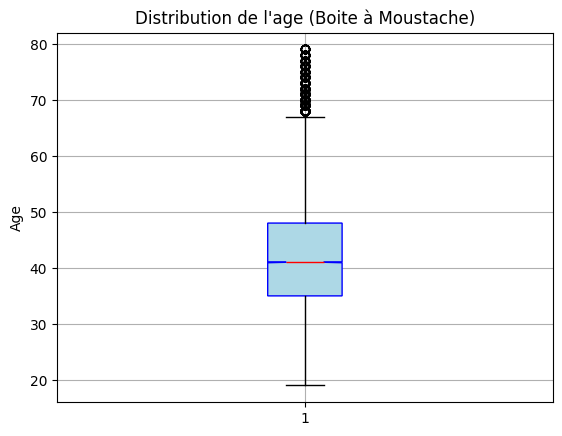

In [336]:
Boxplot(data["AGE"], "Distribution de l'age (Boite à Moustache)", "Age")

 -> **We see that the clients in our dataset are mostly adults(+50% of the population are between 35 and 47)**

Histogramme : flight taken by clients distibution : 

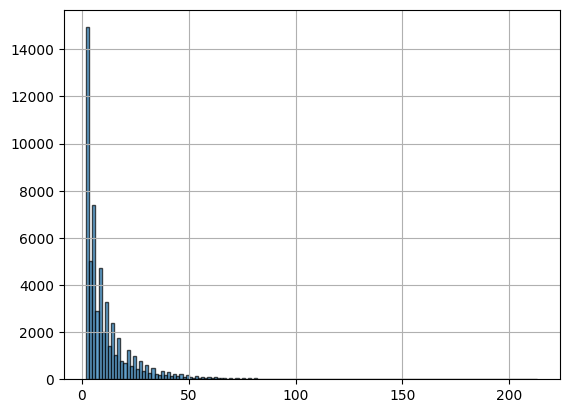

In [337]:
Histogramme(data["FLIGHT_COUNT"], len(data["FLIGHT_COUNT"].unique()), "", "", "")

 -> **we see that most 99% of our clients have less than 50 flight**

Histogramme : for how much kilometers our client have been in the air with us

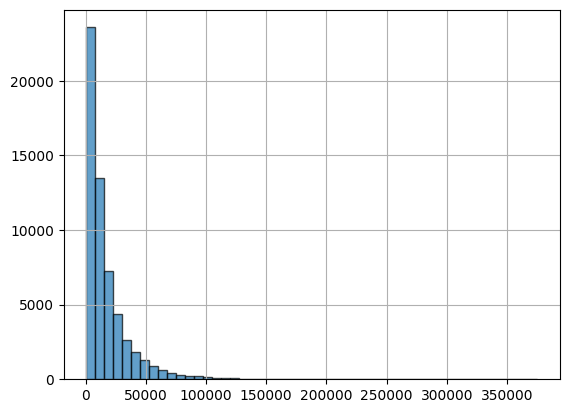

In [338]:
Histogramme(data["SEG_KM_SUM"], 50, "", "", "")

 -> **we see that there is a good distrubution of client most of them are still fresh and the rest have taken many flights with us**

Histogramme : Total points earned distubution

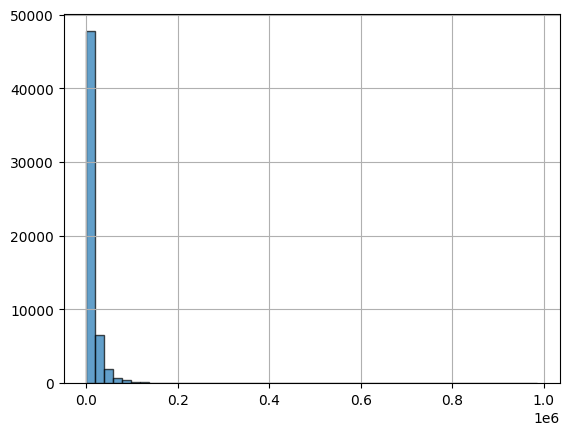

In [339]:
Histogramme(data["Points_Sum"], 50, "", "", "")

Histogramme : average inteval between two flights taken by a client

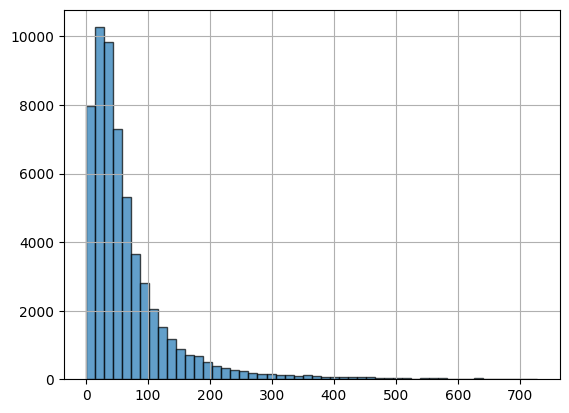

68.15267991219679


In [340]:
Histogramme(data["AVG_INTERVAL"], 50, "", "", "")
print(data["AVG_INTERVAL"].sum() /nrows)

 -> **an average of 2 months(68 days) between two months**


Histogramme : total points made by clients in their first year of enrollement 

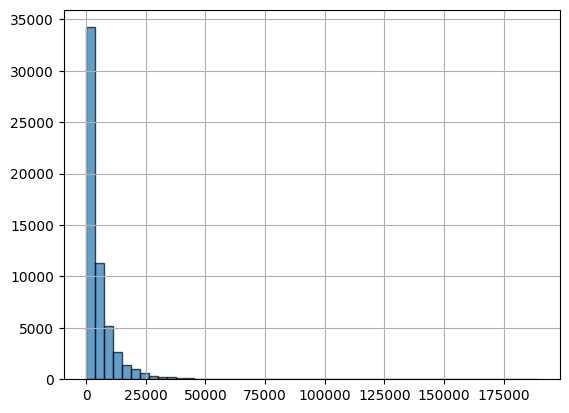

In [341]:
Histogramme(data["SUM_YR_1"], 50, "", "", "")

 -> **More than half of the clients earned nothing on their first year of the enrollment**

Correlation matrix :A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as input into a more advanced analysis, and as a diagnostic for advanced analyses.

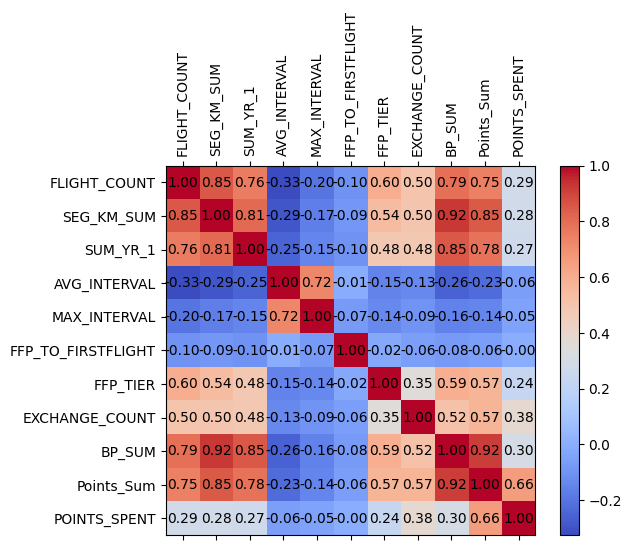

In [342]:
CorrelationData = pd.concat([data["FLIGHT_COUNT"], 
                             data["SEG_KM_SUM"], 
                             data["SUM_YR_1"], 
                             data["AVG_INTERVAL"], 
                             data["MAX_INTERVAL"], 
                             data["FFP_TO_FIRSTFLIGHT"],
                             data["FFP_TIER"],
                             data["EXCHANGE_COUNT"], 
                             data["BP_SUM"],
                             data["Points_Sum"],
                             data["POINTS_SPENT"]],axis=1)

Heatmap(CorrelationData.corr(), CorrelationData.columns, CorrelationData.columns)
# sb.pairplot(CorrelationData)

#### Strong Positive Correlations (values near +1)
- FLIGHT_COUNT vs SEG_KM_SUM (0.85):
Customers who take more flights also tend to travel longer total distances. This is expected—more flights mean more kilometers flown.

- SEG_KM_SUM vs BP_SUM (0.92):
Longer flight distances are strongly associated with more bonus points, possibly due to a reward system based on distance.

- SUM_YR_1 vs Points_Sum (0.78):
The amount spent in the first year correlates with the total points accumulated, which aligns with point-earning being proportional to spending.

- BP_SUM vs Points_Sum (0.92):
Bonus points are a major contributor to the total points, as shown by this near-perfect correlation.

- Points_Sum vs POINTS_SPENT (0.66):
Customers with more points tend to spend more, which is logical.

#### Strong Negative Correlations (values near -1)
- FLIGHT_COUNT vs AVG_INTERVAL (-0.33):
More frequent flyers have shorter intervals between their flights. A lower average interval implies more frequent flights.

- FLIGHT_COUNT vs MAX_INTERVAL (-0.20):
Frequent flyers are less likely to have large gaps between flights.

#### Weak or No Correlation (values near 0)
- FFP_TO_FIRSTFLIGHT vs almost everything:
This variable (likely time between joining the frequent flyer program and first flight) has very low correlation with all other variables. This may mean it's an independent or less influential factor.

- MAX_INTERVAL vs Points_Sum (-0.14):
The longest break between flights has little to do with total points.

GENDER and other categorical variables are not included, which is expected as they are not numerical.

Points Graph: distrubution of flight count over the total Km spent on air

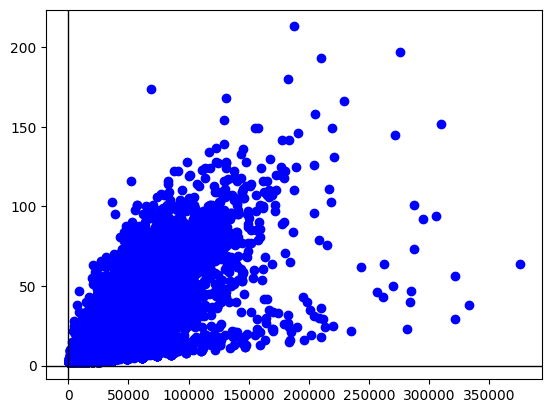

In [343]:
Scatter(data["SEG_KM_SUM"], data["FLIGHT_COUNT"], "", "", "")

Points Graph: fligh count over the avg interval :

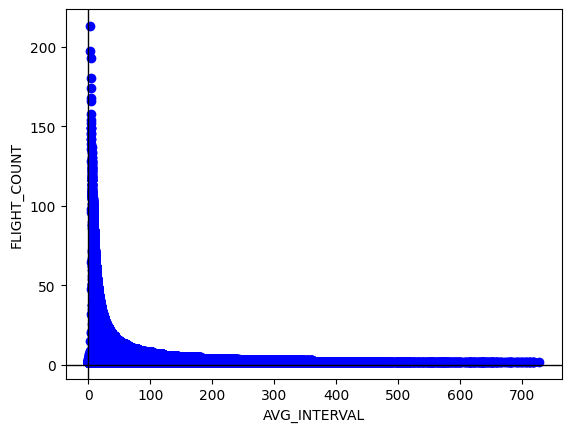

In [344]:
Scatter(data["AVG_INTERVAL"], data["FLIGHT_COUNT"], "", "AVG_INTERVAL", "FLIGHT_COUNT")

Graphe de Points : tiers of subsciption and 

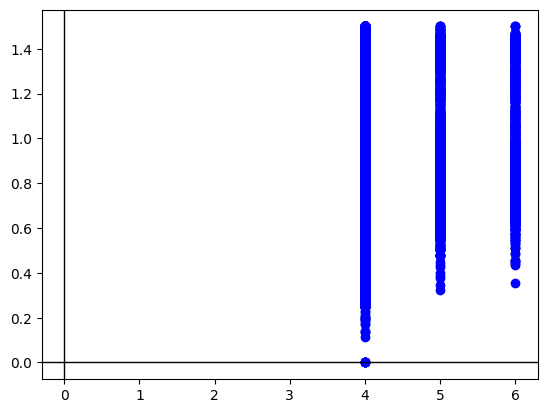

In [345]:
Scatter(data["FFP_TIER"], data["avg_discount"], "", "", "")

-> **We see that in tier 4 discounts starts from 0.05% but int the tier 5 we start at 0.35%, tier 6 we start at 0.45%**

Camembert : Gender

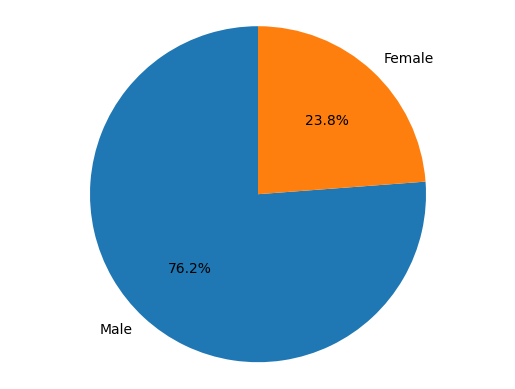

In [346]:
PieChart(data["GENDER"].value_counts(), "")

Diagramme de Barre : distubution of users pick on tiers

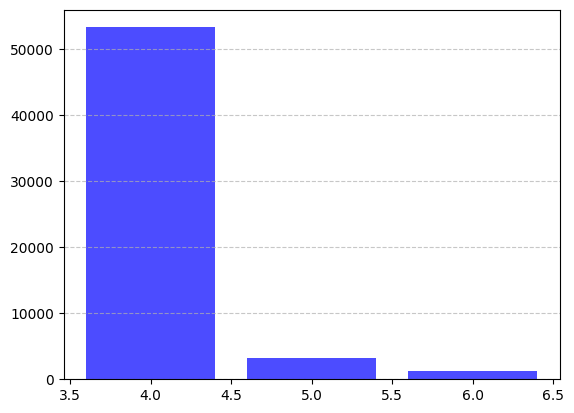

In [347]:
FFP_TierCount = pd.value_counts(data["FFP_TIER"], sort=True)
Barchart(FFP_TierCount, "", "", "")

-> **We see that the majority of clients are chosing the tier 4**

Diagramme de Barre : total points earned by clients and their gender

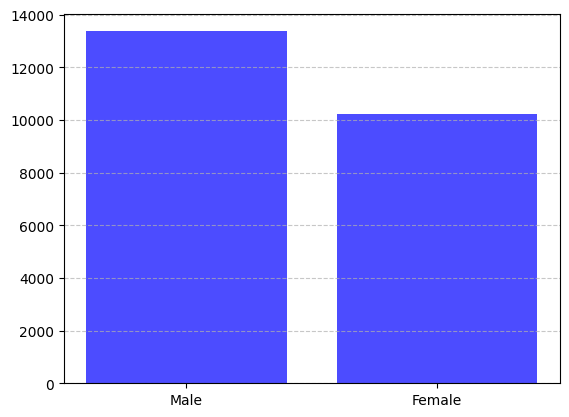

In [348]:
Moy_Points_Sum_by_Gender = pd.concat([data["Points_Sum"], data["GENDER"]], axis=1).groupby("GENDER")["Points_Sum"].mean().sort_values(ascending=False)
Barchart(Moy_Points_Sum_by_Gender, "", "", "")

Diagramme de Barre : Average Points_Sum by GENDER or WORK_COUNTRY

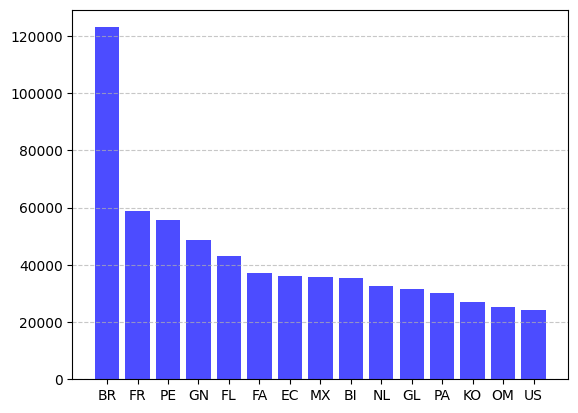

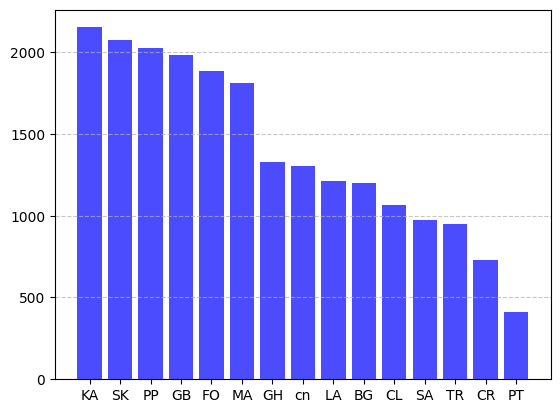

In [349]:
def ApplyOthers(pd_data, limit):
    OthersDF = {"Others": pd_data.iloc[limit:].sum()}
    return pd.concat([pd_data.iloc[:limit], pd.Series(OthersDF)])

Moy_Points_Sum_by_WorkCountry = pd.concat([data["Points_Sum"], data["WORK_COUNTRY"]], axis=1).groupby("WORK_COUNTRY")["Points_Sum"].mean().sort_values(ascending=False)
Barchart(Moy_Points_Sum_by_WorkCountry.head(15), "", "", "")
Barchart(Moy_Points_Sum_by_WorkCountry.iloc[Moy_Points_Sum_by_WorkCountry.count() - 15:], "", "", "")

Camembert : Average Points_Sum by GENDER or WORK_COUNTRY (percentages)

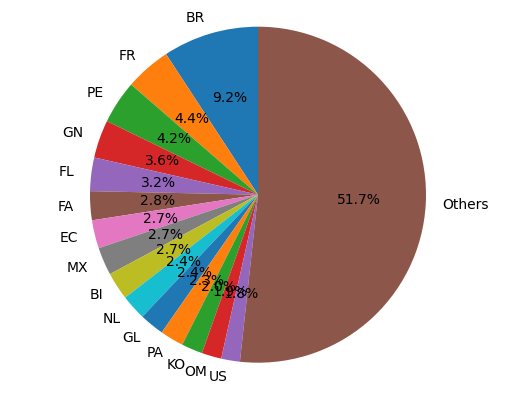

In [350]:
PieChart(ApplyOthers(Moy_Points_Sum_by_WorkCountry, 15), "")

Courbes Temporelles : number of new enrollement each month from 2005 to 2013

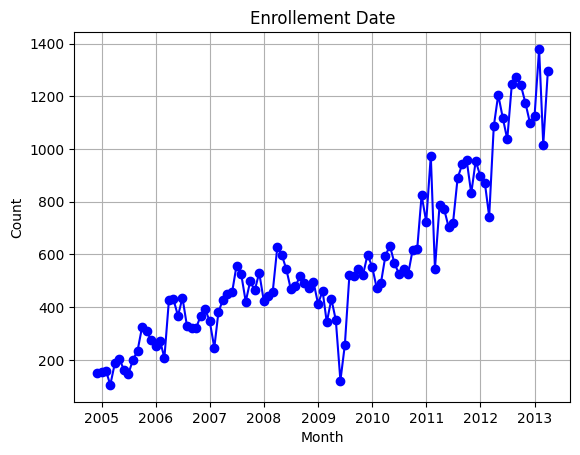

In [351]:

firstFlight_Count = data.groupby(pd.Grouper(key="FFP_DATE", freq="M")).size().reset_index(name="COUNT")
firstFlight_Count.columns = ["FFP_DATE", "COUNT"]

TimePlot(firstFlight_Count, "FFP_DATE", "COUNT", "Enrollement Date", "Month", "Count")

-> **We see that the business is growing with a steady rate (We can apply a regression linear model to predict the number of enrollment in the next years)**

-> **We see the in 2009 month 3 we had a big decreasing jump (maybe because the international 2008 financial crisis)**

Courbes Temporelle : how much first flight in each month

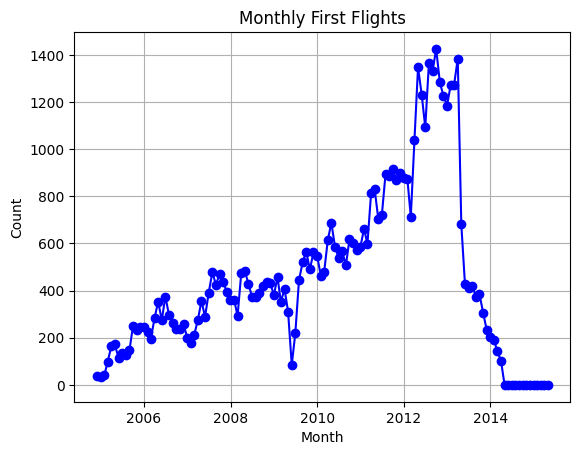

In [352]:
data["FIRST_FLIGHT_DATE"] = pd.to_datetime(data["FIRST_FLIGHT_DATE"])
firstFlight_Count = data.groupby(pd.Grouper(key="FIRST_FLIGHT_DATE", freq="M")).size().reset_index(name="COUNT")
firstFlight_Count.columns = ["FIRST_FLIGHT_DATE", "COUNT"]

TimePlot(firstFlight_Count, "FIRST_FLIGHT_DATE", "COUNT", "Monthly First Flights", "Month", "Count")

Courbe Temporelle : how much last flight in each month

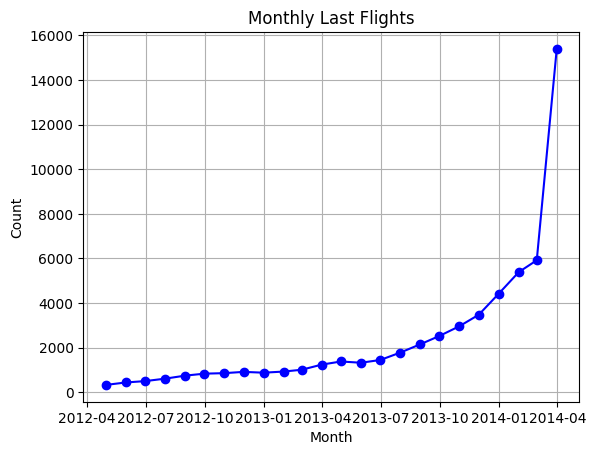

In [353]:
data["LAST_FLIGHT_DATE"] = pd.to_datetime(data["LAST_FLIGHT_DATE"])
firstFlight_Count = data.groupby(pd.Grouper(key="LAST_FLIGHT_DATE", freq="M")).size().reset_index(name="COUNT")
firstFlight_Count.columns = ["LAST_FLIGHT_DATE", "COUNT"]

TimePlot(firstFlight_Count, "LAST_FLIGHT_DATE", "COUNT", "Monthly Last Flights", "Month", "Count")

ACP : 

In [354]:
def ACP(dataMatrix):
    
    def AfficherGraphique(array1, array2, titre, xlabel, ylabel):
        """Afficher un graphique en nuage de points."""
        plt.scatter(array1, array2, marker='o', color='blue', label='Données')
        plt.axhline(0, color='black', linewidth=1)  # Axe horizontal
        plt.axvline(0, color='black', linewidth=1)  # Axe vertical
        plt.title(titre)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.show()

    def AfficherMatrice(array, x_labels, y_labels):
        """Afficher une matrice sous forme de carte thermique avec annotations."""
        fig, ax = plt.subplots()
        cax = ax.matshow(array, cmap='coolwarm')
        for (i, j), val in np.ndenumerate(array):
            ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')
        fig.colorbar(cax)
        ax.set_xticks(range(len(x_labels)))
        ax.set_yticks(range(len(y_labels)))
        ax.set_xticklabels(x_labels, rotation=90)
        ax.set_yticklabels(y_labels)
        plt.show()

    # ----------------------------- Chargement des Données -----------------------------

    columns = dataMatrix.T.columns[0:]

    # Supprimer des lignes spécifiques
    dataMatrix_CR = np.copy(dataMatrix)

    # ----------------------------- Prétraitement --------------------------------------

    # Normaliser les variables (centrage et réduction)
    for variable in dataMatrix_CR:
        mean = np.average(variable)
        std_dev = np.std(variable)
        for i in range(len(variable)):
            variable[i] = (variable[i] - mean) / std_dev
            

    # ----------------------------- Matrice de Corrélation -----------------------------

    # Calculer la matrice de corrélation
    Mat_de_Correlation = (dataMatrix_CR @ dataMatrix_CR.T) / len(dataMatrix_CR[0])
    Mat_de_Correlation = Mat_de_Correlation.astype(float)
    AfficherMatrice(
        Mat_de_Correlation,
        columns,
        columns
    )   
    

    # ----------------------------- Valeurs Propres et Inertie -------------------------

    # Calculer les valeurs propres
    valPropres = np.linalg.eigvals(Mat_de_Correlation).real.astype(float).tolist()

    # Indexer les valeurs propres
    valpropre_indexed = [[i, val] for i, val in enumerate(valPropres)]
    print("Valeurs propres : ", valpropre_indexed, "\n")

    # Calculer l'inertie expliquée
    inertie_explique = [[index, val * 100 / sum(valPropres)] for index, val in valpropre_indexed]
    inertie_explique.sort(key=lambda x: x[1], reverse=True)
    print("Inerties expliquées : ", inertie_explique, "\n")

    # Calculer l'inertie cumulée
    inertie_cumule = []
    cumulative = 0
    for index, val in inertie_explique:
        cumulative += val
        inertie_cumule.append([index, cumulative])
    print("Inerties Cumulées : ", inertie_cumule, "\n")

    # ----------------------------- Composantes Principales ----------------------------

    # Identifier les deux plus grandes valeurs propres
    landa1 = max(valPropres)
    valPropres.remove(landa1)
    landa2 = max(valPropres)

    # Calculer les vecteurs propres
    eig = np.linalg.eig(Mat_de_Correlation)
    v1 = eig[1][:, inertie_explique[0][0]]
    v2 = eig[1][:, inertie_explique[1][0]]

    # Projeter les données sur les deux premières composantes principales
    vector1 = dataMatrix_CR.T @ v1
    vector2 = dataMatrix_CR.T @ v2

    # Afficher le nuage des individus
    AfficherGraphique(
        vector1,
        vector2,
        "Nuage des individus",
        f"F1({inertie_explique[0][1]}%)",
        f"F2({inertie_explique[1][1]}%)"
    )

    # ----------------------------- Cercle de Corrélation ------------------------------

    def CalculerCercleCorrelation():
        """Calculer les coordonnées du cercle de corrélation."""
        cercle_correlation = []
        for i in range(len(dataMatrix_CR)):
            temp = []
            for j in range(len(dataMatrix_CR)):
                temp.append(eig[1][i][j] * math.sqrt(eig[0][j]))
            cercle_correlation.append(temp)
        return np.array(cercle_correlation, dtype=float)

    cercle_correlation = CalculerCercleCorrelation()

    AfficherMatrice(cercle_correlation, ["F"+str(i) for i in range(0, len(cercle_correlation))], columns)

    # Afficher le cercle de corrélation
    def AfficherCercleCorrelation():
        fig, ax = plt.subplots(figsize=(8,8))
        ax.set_xlim(-1, 1)
        ax.set_ylim(-1, 1)
        ax.set_aspect('equal', adjustable='box')
        ax.axhline(0, color='black', linewidth=1)
        ax.axvline(0, color='black', linewidth=1)
        circle = plt.Circle((0, 0), 1, color='blue', fill=False)
        ax.add_artist(circle)
        plt.title("Cercle de corrélation")
        plt.xlabel("F1")
        plt.ylabel("F2")
        plt.grid()
        for i in range(len(cercle_correlation)):
            x, y = cercle_correlation[i][0], cercle_correlation[i][1]
            plt.quiver(0, 0, x, y, angles='xy', scale_units='xy', scale=1, color='blue', alpha=0.8)
            plt.text(x, y, columns[i], fontsize=8, ha='right', va='bottom')
        plt.show()

    AfficherCercleCorrelation()

    # ----------------------------- Qualité de Représentation --------------------------

    def CalculerQualiteRepresentation():
        """Calculer la qualité de représentation des individus."""
        qualite_representation = []
        for i in range(dataMatrix_CR.T.shape[0]):
            somme_carres = np.linalg.norm(dataMatrix_CR.T[i], 2) ** 2
            q1 = (vector1[i] ** 2) / somme_carres
            q2 = (vector2[i] ** 2) / somme_carres
            qualite_representation.append([q1, q2, q1 + q2])
        return qualite_representation

    # Afficher la matrice de qualité de représentation
    AfficherMatrice(
        CalculerQualiteRepresentation()[:15],
        ["F1", "F2", "Total"],
        range(1, 16)
    )

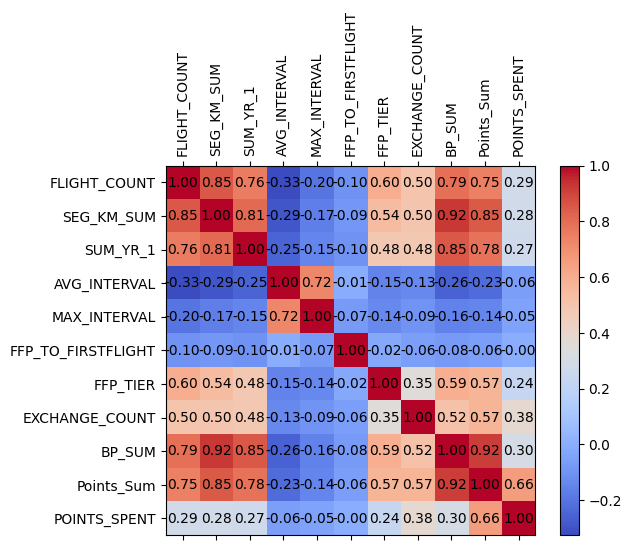

Valeurs propres :  [[0, 5.427805220726759], [1, 1.6155721487045323], [2, 1.0434786684645831], [3, 0.9344226673608288], [4, 0.06410348154606811], [5, 0.28435922885412834], [6, 0.2300431935180236], [7, 0.2031543859089105], [8, 0.5833637158904764], [9, 0.6136972890256898], [10, 1.1002428212044157e-15]] 

Inerties expliquées :  [[0, 49.34368382478871], [1, 14.687019533677564], [2, 9.486169713314391], [3, 8.49475152146208], [9, 5.5790662638699065], [8, 5.30330650809524], [5, 2.585083898673894], [6, 2.0913017592547596], [7, 1.8468580537173678], [4, 0.5827589231460736], [10, 1.0002207465494686e-14]] 

Inerties Cumulées :  [[0, 49.34368382478871], [1, 64.03070335846627], [2, 73.51687307178067], [3, 82.01162459324274], [9, 87.59069085711265], [8, 92.8939973652079], [5, 95.4790812638818], [6, 97.57038302313656], [7, 99.41724107685393], [4, 100.0], [10, 100.00000000000001]] 



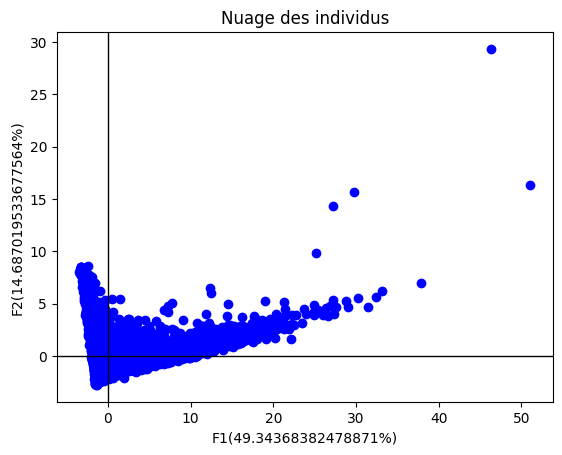

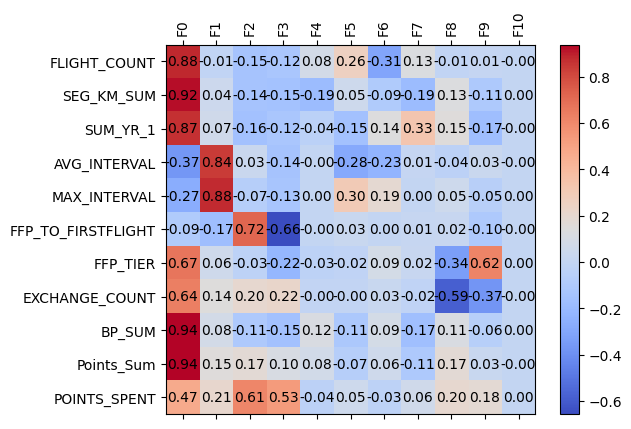

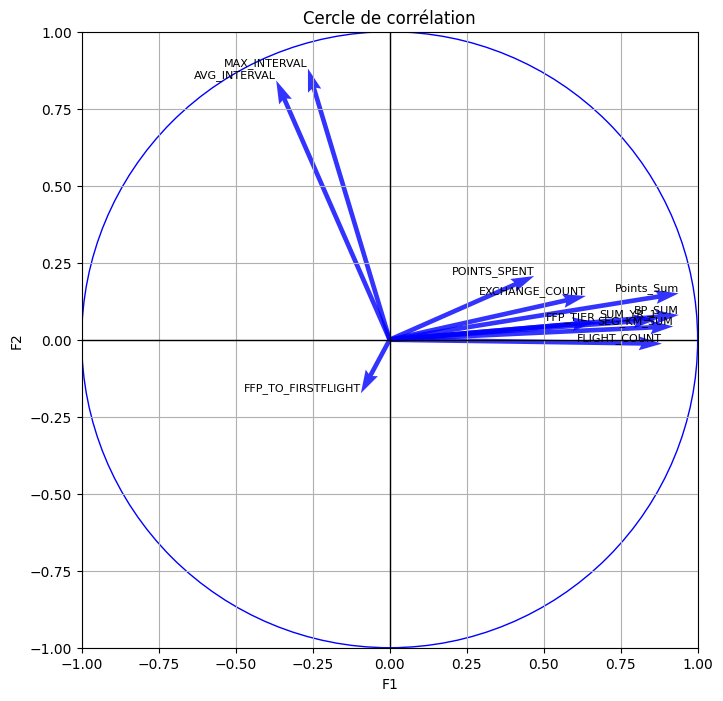

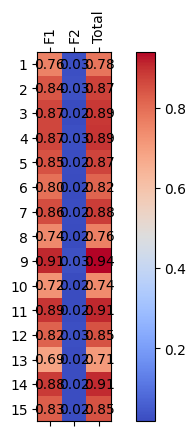

In [355]:
ACP(CorrelationData.T)

# III- Decision making

here are several data-driven decisions and recommendations:
#### 1. Focus on High-Value Customers Based on Travel Frequency and Spending
Customers with high FLIGHT_COUNT, SEG_KM_SUM, and SUM_YR_1 are clearly generating more points and revenue.

 Action: Segment these customers for premium loyalty offers, such as:

- Priority boarding.

- Bonus point multipliers.

- Exclusive access to promotions.

#### 2. Target Marketing Based on Bonus Point Behavior
Strong correlation between BP_SUM and both Points_Sum and SEG_KM_SUM suggests that:

Bonus points are an effective incentive for long-distance travel.

Action:

- Promote point bonuses for long-haul destinations.

- Introduce seasonal point boost campaigns to stimulate engagement.

#### 3. Monitor Customer Inactivity via Interval Metrics
AVG_INTERVAL and MAX_INTERVAL are negatively correlated with most performance metrics (like FLIGHT_COUNT, Points_Sum).

Action:

- Customers with high AVG_INTERVAL or MAX_INTERVAL should be flagged as at risk of churn.

- Deploy reactivation campaigns (emails, discounts) targeting them.

#### 4. Eliminate or Reassess Low-Impact Features
FFP_TO_FIRSTFLIGHT shows almost no correlation with other variables.

 Action:

- Consider dropping this feature from clustering or modeling unless domain knowledge justifies its retention.

- Reassess its significance with advanced techniques (e.g., decision trees, SHAP values) before final removal.

#### 5. Use Correlation to Reduce Feature Redundancy in Modeling
Features like BP_SUM and Points_Sum are very strongly correlated (0.92).

 Action:

- In machine learning models, consider using dimensionality reduction or selecting one of these to avoid multicollinearity.

#### 6. Define Customer Segments for Personalized Loyalty Strategies
Based on patterns of flight frequency, distance, and spending:

You can define clusters like:

“Frequent Short-Trippers”

“Occasional Long-Haulers”

“High Spenders”

 Action:

- Tailor loyalty rewards, email campaigns, and mobile app content to each segment.